In [53]:
import torch
import cv2
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
loaded_model = torch.jit.load('/content/drive/MyDrive/TOP_ROSIES/Challenge_HP/scripted_model.zip')



Number of images to input: 3
Enter the file name: 477.jpg


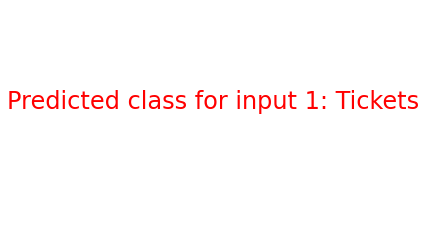

In [71]:
#file_name='Drawing_1924860_0.png'

num_inputs=input("Number of images to input: ")
images=[]
for i in num_inputs:
  file_name = input("Enter the file name: ")
  images+=[file_name]

inputs=preprocess(images)

loaded_model.eval()  # Set model to evaluation mode
outputs = loaded_model(inputs)  # Forward pass through the model

postprocess(outputs)

In [69]:
def preprocess(list_images):
  transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
  input_tensors=[]

  for img_name in list_images:
    img = Image.open(img_name)
    img_tensor = transform(img)
    img_tensor = img_tensor.unsqueeze(0)  # Add a batch dimension
    input_tensors+=[img_tensor]
    
  return torch.cat(input_tensors,dim=0)

def postprocess(outputs):
  class_names=['Documents', 'Plans', 'Tickets']

  pred_classes=[]
  text=''
  
  _, preds = torch.max(outputs, 1)

  for j,pred in enumerate(preds):
    pred_classes+=[class_names[preds[j]]]
    text+='Predicted class for input {}: {}\n'.format(j+1,class_names[preds[j]])

  plt.text(0.5, 0.5, text, ha='center', va='center', size=24, color='red')
  plt.axis('off')
  plt.show()

In [65]:
num_inputs=input("Number of images to input: ")
images=[]
for i in num_inputs:
  file_name = input("Enter the file name: ")
  images+=[file_name]


#print("The file name is: ", file_name)


torch.Size([3, 3, 224, 224])